# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [2]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
data_babe = pd.read_csv("US_Baby_Names.csv")

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [3]:
data_babe.sample(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
913292,5076896,5076897,Azel,2014,M,TX,5
612887,3467899,3467900,Andy,2007,M,NJ,48
511802,2815525,2815526,Norah,2014,F,MO,66
876122,4928157,4928158,Dalia,2012,F,TX,17
254244,1317472,1317473,Trent,2008,M,GA,26
657335,3733316,3733317,Jayline,2008,F,NY,8
521261,2871942,2871943,Izaiah,2013,M,MO,16
440448,2413393,2413394,Alonzo,2008,M,MD,11
128714,699891,699892,Rami,2011,M,CA,15
299838,1629625,1629626,Ivy,2007,F,IL,38


### 03. Cho biết kích thước dữ liệu

In [4]:
data_babe.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [5]:
data_babe = data_babe.drop('Unnamed: 0', axis = 1 )

In [6]:
data_babe = data_babe.drop('Id', axis = 1 )

In [7]:
data_babe.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### 05. Cho biết số lượng bé trai, bé gái?

In [8]:
# So luong be gai
data_babe[data_babe['Gender'] == 'F'].count().Name


558846

In [9]:
# So luong be trai
data_babe[data_babe['Gender'] == 'M'].count().Name

457549

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [10]:
len(data_babe.Name.drop_duplicates())

17632

### 07. Tên nào xuất hiện ít nhất?

In [11]:
values_min = data_babe.Name.value_counts().sort_values(ascending=True)
values_min[values_min == values_min[0]]

Coalton      1
Mohamadou    1
Dominga      1
Zailee       1
Zailynn      1
            ..
Yoali        1
Mikela       1
Meeya        1
Mar          1
Moorea       1
Name: Name, Length: 3682, dtype: int64

### 08. Top 10 tên được sử dụng nhiều nhất?

In [12]:
values_max = data_babe.Name.value_counts().sort_values(ascending=False)
values_max[:10]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

## TRỰC QUAN DỮ LIỆU

In [13]:
import matplotlib.pyplot as plt

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

In [14]:
data_top10_2014 = data_babe[data_babe['Year'] == 2014]

In [15]:
data_top10_2014

,Name,Year,Gender,State,Count
2173,Emma,2014,F,AK,50
2174,Olivia,2014,F,AK,47
2175,Sophia,2014,F,AK,43
2176,Aurora,2014,F,AK,35
2177,Isabella,2014,F,AK,33
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


In [81]:
data_top10_2014.groupby(['Name'])['Count'].sum().sort_values(ascending=False)
# .sort_values("Count", ascending=False).head(20)
# data_top10_2014.groupby(['Name'])['Count'].sum()


Name
Emma         20799
Olivia       19674
Noah         19198
Sophia       18495
Liam         18347
             ...  
Joanthony        5
Solyana          5
Joesph           5
Soloman          5
Hiyab            5
Name: Count, Length: 9585, dtype: int64

In [92]:
data_top10_2014_clean = data_top10_2014.groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]

In [93]:
data_top10_2014_clean

Name
Emma        20799
Olivia      19674
Noah        19198
Sophia      18495
Liam        18347
Mason       17117
Isabella    16950
Jacob       16712
William     16687
Ethan       15619
Name: Count, dtype: int64

In [94]:
data_top10_2014_clean.values

array([20799, 19674, 19198, 18495, 18347, 17117, 16950, 16712, 16687,
       15619], dtype=int64)

In [95]:
plt.figure(figsize = (30, 80))


<Figure size 2160x5760 with 0 Axes>

<Figure size 2160x5760 with 0 Axes>

Text(0.5, 1.0, 'So luong top 10 nguoi xuat hien nhieu nhat')

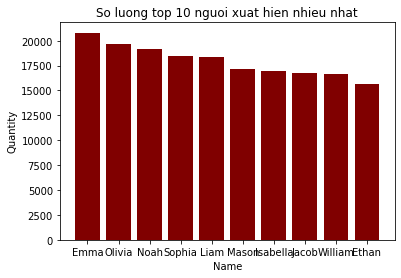

In [96]:
plt.bar(data_top10_2014_clean.index,data_top10_2014_clean.values, color ='maroon' )
plt.xlabel("Name")
plt.ylabel("Quantity")
plt.title("So luong top 10 nguoi xuat hien nhieu nhat")

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

In [97]:
## khoang tg
data_rate = data_babe.groupby(['Year', 'Gender'])['Count'].sum()
# data_rate = data_rate.reset_index(name='Count')
data_rate

Year  Gender
2004  F         1523496
      M         1770488
2005  F         1528165
      M         1777150
2006  F         1564886
      M         1822851
2007  F         1576648
      M         1835769
2008  F         1544411
      M         1795907
2009  F         1493172
      M         1738944
2010  F         1439346
      M         1677202
2011  F         1422539
      M         1656606
2012  F         1422020
      M         1651838
2013  F         1419351
      M         1647092
2014  F         1446259
      M         1667352
Name: Count, dtype: int64

In [98]:
data_rate = data_rate.reset_index()

In [117]:
data_rate[data_rate['Gender'] == 'F']['Count'].values

array([1523496, 1528165, 1564886, 1576648, 1544411, 1493172, 1439346,
       1422539, 1422020, 1419351, 1446259], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


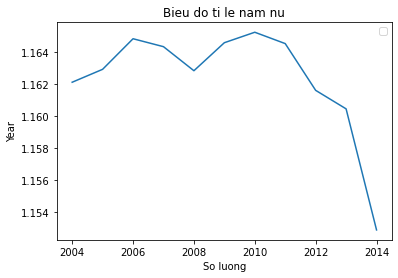

In [118]:
x = list(range(2004, 2015))
rate =  data_rate[data_rate['Gender'] == 'M']['Count'].values/data_rate[data_rate['Gender'] == 'F']['Count'].values
# plt.plot()
plt.plot(x, rate)
plt.title('Bieu do ti le nam nu')
plt.xlabel('So luong')
plt.ylabel('Year')
plt.legend()